# Linear Regrssion Model to Predict Service Times 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import *
from sklearn.metrics         import mean_squared_error
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.preprocessing   import OneHotEncoder
from sklearn.preprocessing   import LabelEncoder


In [ ]:
# !pip install rfpimp

In [ ]:
data = pd.read_excel('RGG_RSS_final.xlsx')
len(data)

12826

In [ ]:
data = data.loc[data['Outlier']==0]

In [ ]:
# Create train_df that only include variables of interest 

train_df = data[['Commodity', '16 gal', '20 gal','32 gal', '64 gal', '96 gal',
                '#Units','Day', 'Company', 'Truck', 'Neighborhood','Has Key']]
train_df

,Commodity,16 gal,20 gal,32 gal,64 gal,96 gal,#Units,Day,Company,Truck,Neighborhood,Has Key
0,Recycle,0,0,1,2,2,5,2,RSS,SL,Inner Richmond,False
1,Recycle,0,0,0,0,1,1,2,RSS,SL,Inner Richmond,False
2,Recycle,0,0,0,0,1,1,2,RSS,SL,Inner Richmond,False
3,Recycle,0,0,1,0,1,2,2,RSS,SL,Inner Richmond,False
4,Recycle,0,0,1,0,0,1,2,RSS,SL,Inner Richmond,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12821,Compost,0,0,0,1,0,1,4,RGG,RL,Chinatown,False
12822,Compost,0,0,0,3,0,3,4,RGG,RL,Chinatown,False
12823,Compost,0,0,0,2,0,2,4,RGG,RL,Chinatown,False
12824,Compost,0,0,0,2,0,2,4,RGG,RL,Chinatown,False


In [ ]:
# Create new df with dummy variables 

dum_df = pd.get_dummies(train_df,columns=['Commodity', 'Company','Day', 'Neighborhood','Truck','Has Key'])
dum_df


,16 gal,20 gal,32 gal,64 gal,96 gal,#Units,Commodity_Compost,Commodity_Garbage,Commodity_Garbage/Compost,Commodity_Garbage/Recycle,...,Neighborhood_SOMA,Neighborhood_Tresure Island,Neighborhood_Visitation Valley,Neighborhood_West Twin Peaks,Neighborhood_Western Addition,Truck_FL,Truck_RL,Truck_SL,Has Key_False,Has Key_True
0,0,0,1,2,2,5,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12821,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
12822,0,0,0,3,0,3,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
12823,0,0,0,2,0,2,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
12824,0,0,0,2,0,2,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
sum(dum_df['Day_na'])

217

In [ ]:
X = dum_df
y = data['Time']

In [ ]:
# Create Train and validation sets 
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2, random_state=16)

In [ ]:

pipe = Pipeline([('scaler', StandardScaler()),
                 ('lr', LinearRegression())]) 



In [ ]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

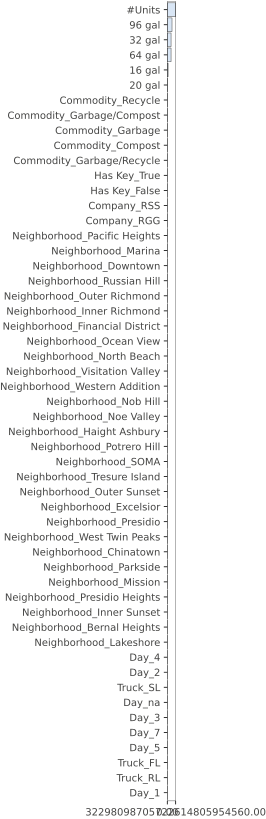

In [ ]:
from rfpimp import *
lm = LinearRegression()
lm.fit(X_train, y_train)
I = importances(lm, X_train, y_train)
plot_importances(I)

In [ ]:
I.sort_values(['Importance'],ascending=False)

,Importance
Feature,
#Units,3.229810e+25
96 gal,1.819257e+25
32 gal,1.452419e+25
64 gal,1.450156e+25
16 gal,3.012105e+24
20 gal,5.544447e+23
Commodity_Recycle,3.460376e+23
Commodity_Garbage/Compost,2.550361e+23
Commodity_Garbage,2.257649e+23


In [ ]:
y_pred = pipe.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*lm.score(X_validation, y_validation):.0f}%")

mean squared error: 2,243.51, Accuracy 54%


In [ ]:
algorithms = [LinearRegression(), 
              Lasso(), 
              Ridge(), 
              ElasticNet(), 
              HuberRegressor(), 
              SGDRegressor()]

for algo in algorithms:
    pipe2 = Pipeline([('scaler', StandardScaler()), 
                     ('lm',     algo)])

    pipe2.fit(X_train, y_train)
    y_pred = pipe2.predict(X_validation)
    mse = mean_squared_error(y_validation, y_pred)
    print(f"{algo.__class__.__name__:<17} - mean squared error: {mse:,.2f}")

LinearRegression  - mean squared error: 2,609.31
Lasso             - mean squared error: 2,628.65
Ridge             - mean squared error: 2,608.59
ElasticNet        - mean squared error: 2,865.79
HuberRegressor    - mean squared error: 2,685.73
SGDRegressor      - mean squared error: 2,633.32


# Try tuning hyperparameters for Ridge Regression Model 

In [ ]:
pipe_ridge = Pipeline([('scaler', StandardScaler()),
                        ('rr', Ridge())]) 
pipe_ridge.fit(X_train, y_train)
y_pred = pipe_ridge.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*pipe_ridge.score(X_validation, y_validation):.0f}%")

mean squared error: 2,608.60, Accuracy 58%


In [ ]:
pipe_ridge['rr'].get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [ ]:
hyperparameters = {'alpha': 0.5,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

pipe_ridge = Pipeline([('scaler', StandardScaler()),
                        ('rr', Ridge(**hyperparameters))]) 
pipe_ridge.fit(X_train, y_train)
y_pred = pipe_ridge.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*pipe_ridge.score(X_validation, y_validation):.0f}%")

mean squared error: 2,608.59, Accuracy 58%


In [ ]:
# Try Ridge CV 

pipe_ridge = Pipeline([('scaler', StandardScaler()),
                        ('rrcv', RidgeCV())]) 
pipe_ridge.fit(X_train, y_train)
y_pred = pipe_ridge.predict(X_validation)
mse = mean_squared_error(y_validation, y_pred)
print(f"mean squared error: {mse:,.2f}, Accuracy {100*pipe_ridge.score(X_validation, y_validation):.0f}%")

mean squared error: 2,608.65, Accuracy 58%


In [ ]:
X_validation

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=938c6ad9-491d-4307-bf8a-c751a244ce4f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>